In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [2]:
dataset=pd.read_csv('Allprop1.csv')

In [3]:
dataset.describe()

,Al,Cu,Si,Fe,Mn,zn,Ti,Mg,Residuals,(UTS),Tensile Strength: Yield (Proof),Brinell Hardness,Fatigue Strength
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,88.469512,1.618293,6.150000,0.497927,0.200000,1.098171,0.094512,1.470732,0.134146,242.682927,148.682927,67.536585,107.414634
std,5.200960,2.294552,5.534692,0.307979,0.124122,1.944965,0.060599,2.262921,0.075778,57.053676,52.321334,17.083761,40.621408
min,76.150000,0.000000,0.075000,0.065000,0.000000,0.000000,0.000000,0.050000,0.000000,130.000000,50.000000,41.000000,48.000000
25%,85.400000,0.100000,0.175000,0.250000,0.150000,0.075000,0.050000,0.050000,0.075000,200.000000,110.000000,56.000000,70.000000
50%,89.750000,0.300000,5.500000,0.500000,0.175000,0.250000,0.125000,0.500000,0.100000,250.000000,148.000000,60.000000,105.000000
75%,92.400000,3.500000,9.500000,0.650000,0.250000,1.250000,0.125000,1.000000,0.250000,290.000000,170.000000,80.000000,140.000000
max,95.100000,10.000000,19.000000,1.250000,0.500000,7.000000,0.200000,8.000000,0.250000,330.000000,270.000000,120.000000,190.000000


In [4]:
X=dataset.drop(columns=['(UTS)','Tensile Strength: Yield (Proof)','Brinell Hardness','Fatigue Strength'])
Y=dataset[['Fatigue Strength']]

In [5]:
from sklearn.model_selection import train_test_split as ts
xtrain,xtest,ytrain,ytest= ts(X,Y,test_size=0.30,random_state=109)

In [6]:
sm= svm.SVR(kernel='linear')
sm.fit(xtrain,ytrain)

C:\Users\Vedant\.conda\envs\ANN\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [7]:
rf= RandomForestRegressor(n_estimators=10, random_state=1)

In [8]:

rf.fit(xtrain,ytrain)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_15572\2707660161.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=10, random_state=1)

In [9]:
test_data = np.array([88.25,7,2,0.6,0.3,0.125,0.125,0.05,0.25])

In [10]:
pred_rf = rf.predict(test_data.reshape(1,9))
pred_svm = sm.predict(test_data.reshape(1,9))

C:\Users\Vedant\.conda\envs\ANN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Vedant\.conda\envs\ANN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [11]:
print ('pred_rf =',pred_rf, 'pred_svm=',pred_svm)

pred_rf = [95.3] pred_svm= [92.90010568]


In [12]:
from sklearn import metrics


ytest_predict_rf =rf.predict(X)
ytest_predict_sm =sm.predict(X)
print('Mean Absolute Percentage Error for Random Forest:', metrics.mean_absolute_percentage_error(Y,ytest_predict_rf))
print('Mean Absolute Percentage Error for SVM:', metrics.mean_absolute_percentage_error(Y,ytest_predict_sm))

Mean Absolute Percentage Error for Random Forest: 0.1538732693867908
Mean Absolute Percentage Error for SVM: 0.3316437558732017


In [13]:
import matplotlib.pyplot as pl

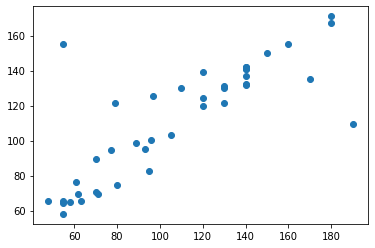

In [14]:
pl.scatter(Y,ytest_predict_rf)


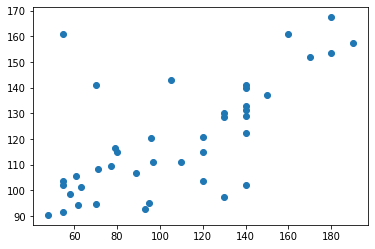

In [15]:
pl.scatter(Y,ytest_predict_sm)

In [16]:
 import pickle

    
saved_model_rf = open('RF_fatigue', 'wb')
pickle.dump(rf, saved_model_rf)  


In [17]:
    
saved_model_svm = open('SVM_fatigue', 'wb')
pickle.dump(sm, saved_model_svm)  
